In [22]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
sns.set()

# Style options for plots.
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', figsize=(17, 4))

# Style options for pandas
pd.set_option('display.max_columns', None)

# Analyse des données

## Données nationales sur les véhicules électriques

Text(0.5, 1.0, 'Evolution du nombre des nouveaux véhicules électriques en France')

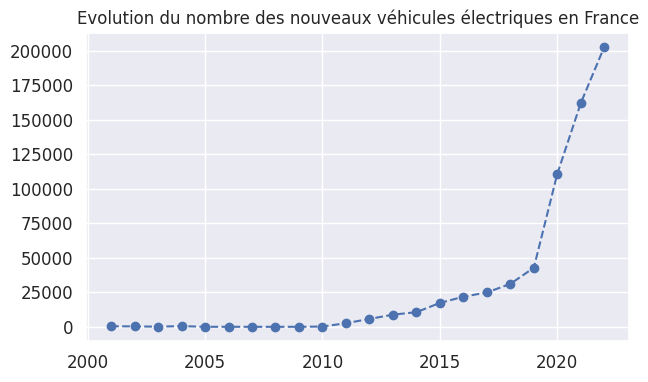

In [3]:
df_france = pd.DataFrame({'Year':[i for i in range(2001,2023)],'Nb_VE':[0.4,0.3,0.1,0.5,0.006,0.014,0.001,0,0.01,0.2,2.6,5.7,8.8,10.6,17.3,21.8,24.9,31.1,42.8,110.9,162.1,202.9]})
df_france['Nb_VE'] = df_france['Nb_VE']*1000
# plt.plot(df_france['Year'],df_france['Nb_VE'])
plt.plot(df_france['Year'],df_france['Nb_VE'], linestyle='--', marker='o', color='b')
plt.title('Evolution du nombre des nouveaux véhicules électriques en France')

## Emissions du CO2 en france

Text(0.5, 1.0, 'Evolution des Emissions en France en MtCO2')

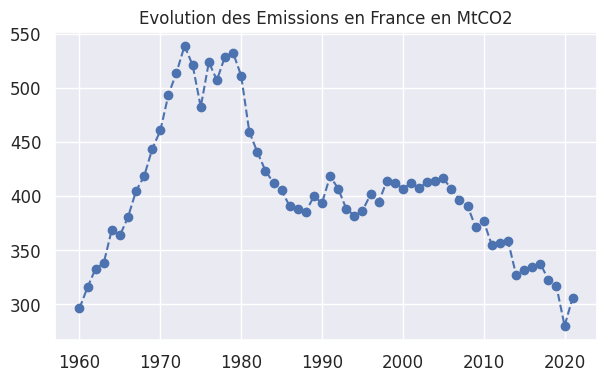

In [4]:
df_co2 = pd.read_csv('./data/Emmision_1960-2021.csv',sep=';')
plt.plot(df_co2['année'],df_co2['emissions'], linestyle='--', marker='o', color='b')
plt.title('Evolution des Emissions en France en MtCO2')

## Trafic routier journalier annuel 

In [5]:
def merge_data():
    paths = ['./data/TMJA/TMJA_'+str(i)+'.csv' for i in range(2007,2017)]+['./data/TMJA/tmja-2017.csv','./data/TMJA/tmja2018.csv','./data/TMJA/tmja-2019.csv']
    df = pd.concat([pd.read_csv(path,sep='\t') for path in paths]+[pd.read_csv('./data/TMJA/tmja-2017.csv',sep='\t'),pd.read_csv('./data/TMJA/tmja2018.csv',sep='\t'),pd.read_csv('./data/TMJA/tmja-2019.csv',sep=';')], ignore_index=True)
    # convert date to year
    df['dateReferentiel'] =  pd.to_datetime(df['dateReferentiel']).dt.year
    # goupe by year and department over routes
    df = df.groupby(['dateReferentiel','depPrD']).mean()
    # remove useless columns
    df.drop(['prD','zD','prF','zF','depPrF','anneeMesureTrafic'],axis=1,inplace=True)
    df.to_csv('./data/TMJA_2007-2019.csv')
    df.reset_index(inplace=True)
    # fill nan values with mean
    df.TMJA.fillna(df.TMJA.mean(),inplace=True)
    # add a 96 row to the dataframe 
    for year in [2020,2021,2022]:
        for dep in df.depPrD.unique():
            df.loc[len(df)] = [year,dep,df[df['depPrD'] == dep]['TMJA'].mean()]
    #  use this dataset to get the commune from department codes
    # commune_depart=pd.read_csv('./data/communes-departement-region.csv')
    # commune_depart=commune_depart[['nom_commune_complet','code_departement']]
    # commune_depart.nom_commune_complet=commune_depart.nom_commune_complet.str.lower()
    # # merge the two datasets
    # df.depPrD=df.depPrD.astype(int).astype(str)
    # df=df.merge(commune_depart,how='left',left_on='depPrD',right_on='code_departement')
    # # remove useless columns
    # df=df[['dateReferentiel','nom_commune_complet','TMJA']]
    return df
df_tmja = merge_data()
df_tmja.tail(2)

/tmp/ipykernel_37249/1519153955.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['dateReferentiel','depPrD']).mean()


,dateReferentiel,depPrD,TMJA
1502,2022.0,94.0,111946.956533
1503,2022.0,95.0,82589.455624


In [6]:
df_tmja.tail(2)

,dateReferentiel,depPrD,TMJA
1502,2022.0,94.0,111946.956533
1503,2022.0,95.0,82589.455624


<AxesSubplot: title={'center': 'Evolution du TMJA par département'}, xlabel='dateReferentiel', ylabel='TMJA'>

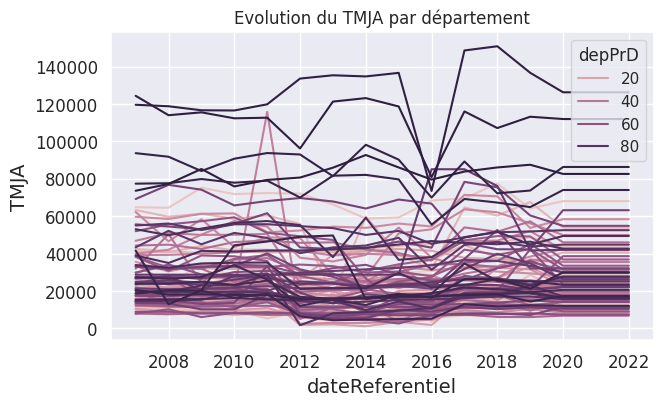

In [13]:
plt.title('Evolution du TMJA par département')
sns.lineplot(data=df_tmja, x="dateReferentiel", y="TMJA", hue="depPrD")


# Données agglomérées

In [38]:
df = pd.read_csv('./data/big_data.csv')

<AxesSubplot: title={'center': 'Evolution du nombre des VE par cluster'}, xlabel='date_arrete', ylabel='nb_vp_rechargeables_el'>

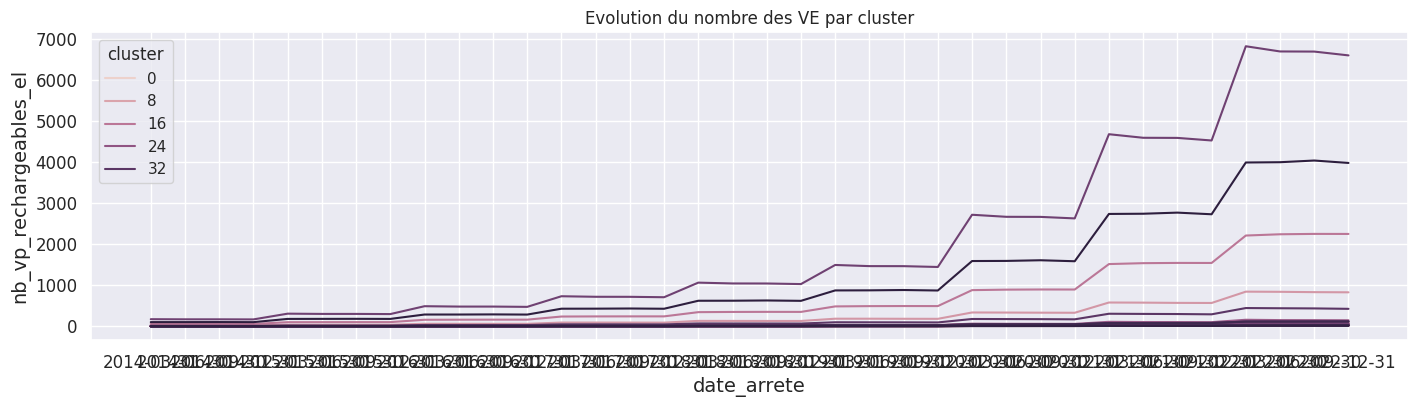

In [39]:
plt.title('Evolution du nombre des VE par cluster')
sns.lineplot(data=df, x="date_arrete", y="nb_vp_rechargeables_el", hue="cluster")


In [48]:
df_ = pd.read_csv('./Cluster/data_commune_cluster.csv')
df_.drop(['Unnamed: 0.1','Unnamed: 0','codgeo','libgeo','Typologie urbain/rural','latitude','longitude','LIBGEO'],axis=1,inplace=True)
df_

,population,com_life_level,rurality,cluster
0,771,21577.0,1,3
1,253,21673.0,0,6
2,14204,19756.0,4,35
3,1720,23205.0,2,3
4,112,22158.0,0,3
...,...,...,...,...
31366,497,25561.0,3,23
31367,861,28242.0,4,5
31368,28041,14280.0,5,24
31369,187,26294.0,3,23


In [50]:
data = df.merge(df_,how='left',left_on=['cluster'],right_on=['cluster'])
data

,Unnamed: 0,cluster,date_arrete,nb_vp_rechargeables_el,emissions,TMJA,population,com_life_level,rurality
0,0,0,2014-03-31,0,327.1073,19921.838015,1020,20611.0,3
1,0,0,2014-03-31,0,327.1073,19921.838015,381,21948.0,3
2,0,0,2014-03-31,0,327.1073,19921.838015,123,20779.0,3
3,0,0,2014-03-31,0,327.1073,19921.838015,395,20077.0,3
4,0,0,2014-03-31,0,327.1073,19921.838015,369,20835.0,3
...,...,...,...,...,...,...,...,...,...
1129279,1367,39,2022-12-31,3984,305.9637,49829.881857,290053,17316.0,5
1129280,1367,39,2022-12-31,3984,305.9637,49829.881857,217728,20198.0,5
1129281,1367,39,2022-12-31,3984,305.9637,49829.881857,314138,20936.0,5
1129282,1367,39,2022-12-31,3984,305.9637,49829.881857,233098,18000.0,5


In [51]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [52]:
data

,cluster,date_arrete,nb_vp_rechargeables_el,emissions,TMJA,population,com_life_level,rurality
0,0,2014-03-31,0,327.1073,19921.838015,1020,20611.0,3
1,0,2014-03-31,0,327.1073,19921.838015,381,21948.0,3
2,0,2014-03-31,0,327.1073,19921.838015,123,20779.0,3
3,0,2014-03-31,0,327.1073,19921.838015,395,20077.0,3
4,0,2014-03-31,0,327.1073,19921.838015,369,20835.0,3
...,...,...,...,...,...,...,...,...
1129279,39,2022-12-31,3984,305.9637,49829.881857,290053,17316.0,5
1129280,39,2022-12-31,3984,305.9637,49829.881857,217728,20198.0,5
1129281,39,2022-12-31,3984,305.9637,49829.881857,314138,20936.0,5
1129282,39,2022-12-31,3984,305.9637,49829.881857,233098,18000.0,5
